In [11]:
from station_data import *
from stream_processing import *
from event_detection import *
from catalogued_events import *
from stream_processing import *
import matplotlib.pyplot as plt
from obspy import UTCDateTime
import torch
import sys
from report_generation import *

### This Notebook produces contents for report or email notification using previous saved files of data produced.

Initiating Parameters for Report Content Generation

In [12]:
# Set date and station for studying423
date = UTCDateTime("2024-04-22") 
station = ['AM','R50D6','https://data.raspberryshake.org']

# Generate a path for all files to be saved to
date_folder = generate_data_path(date, station)
content_path = os.path.join(date_folder, "generated")
os.makedirs(content_path, exist_ok=True)

Reading Saved Files

In [13]:
saved_catalogue, provider = read_catalogue_file(date_folder)
saved_df_completed = read_csv_from_path(date_folder, date, station, 'completed')
saved_processed_stream = read_stream_from_path(date_folder, date, station, 'processed')
saved_annotated_stream = read_stream_from_path(date_folder, date, station, 'processed.annotated')

Loaded data from D:\Dissertation\data\AM.R50D6\2024-04-22\2024-04-22_IRIS.catalogue.xml
Loaded data from D:\Dissertation\data\AM.R50D6\2024-04-22\2024-04-22.completed.csv
Loaded stream from D:\Dissertation\data\AM.R50D6\2024-04-22\2024-04-22_AM.R50D6..Z.processed.mseed
Loaded stream from D:\Dissertation\data\AM.R50D6\2024-04-22\2024-04-22_AM.R50D6..Z.processed.annotated.mseed


In [14]:
saved_catalogue

78 Event(s) in Catalog:
2024-04-23T00:11:02.661000Z | +23.898, +121.598 | 5.2  mb
2024-04-23T00:04:05.608000Z | +23.803, +121.676 | 5.8  mww
...
2024-04-22T01:54:33.184000Z |  +3.724,  +93.033 | 4.2  mb
2024-04-22T01:11:57.452000Z | +27.680,  +56.035 | 4.0  mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'

Save Catalogue Globe Plot To File

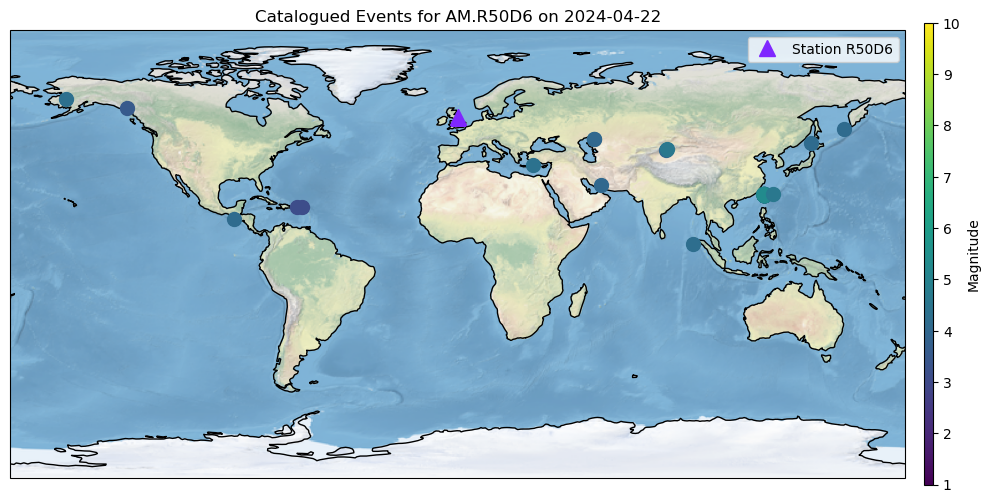

In [15]:
plot_catalogue(saved_catalogue,station, date,  fill_map = True, path=content_path,show=True, save=False);

In [16]:
plot_catalogue(saved_catalogue,station, date,  fill_map = True, path=content_path,show=False, save=True);

Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-22\generated\catalogued_plot_2024-04-22.png


Save Wave+Annotation Plots For Matched Events To File Using Event ID

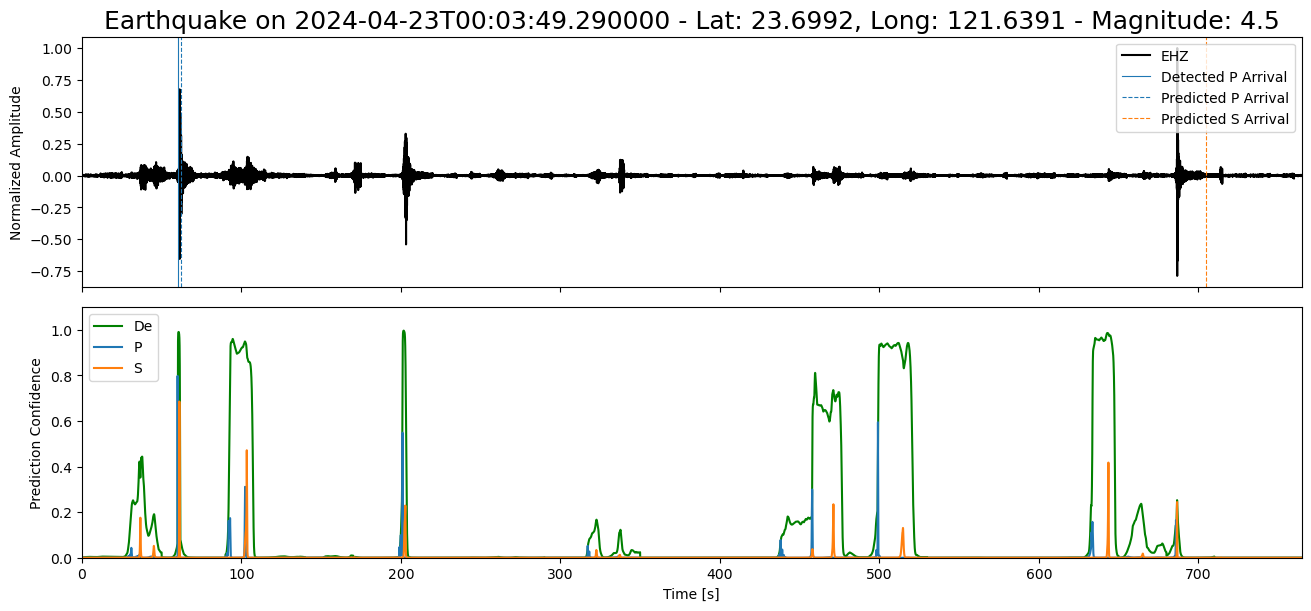

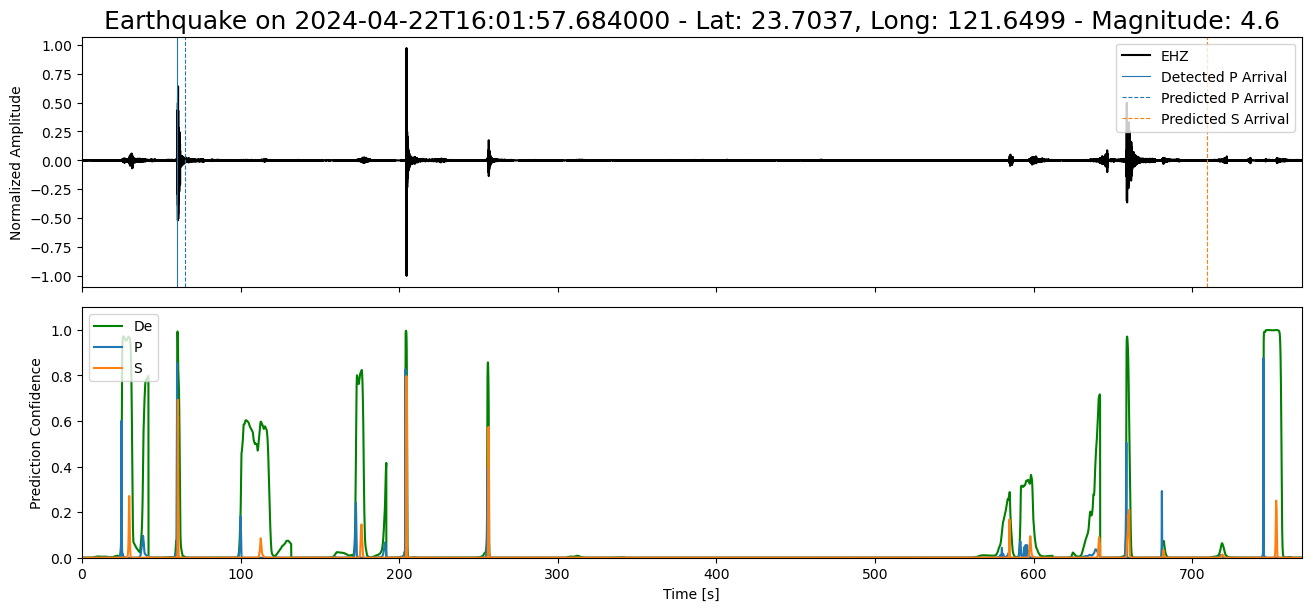

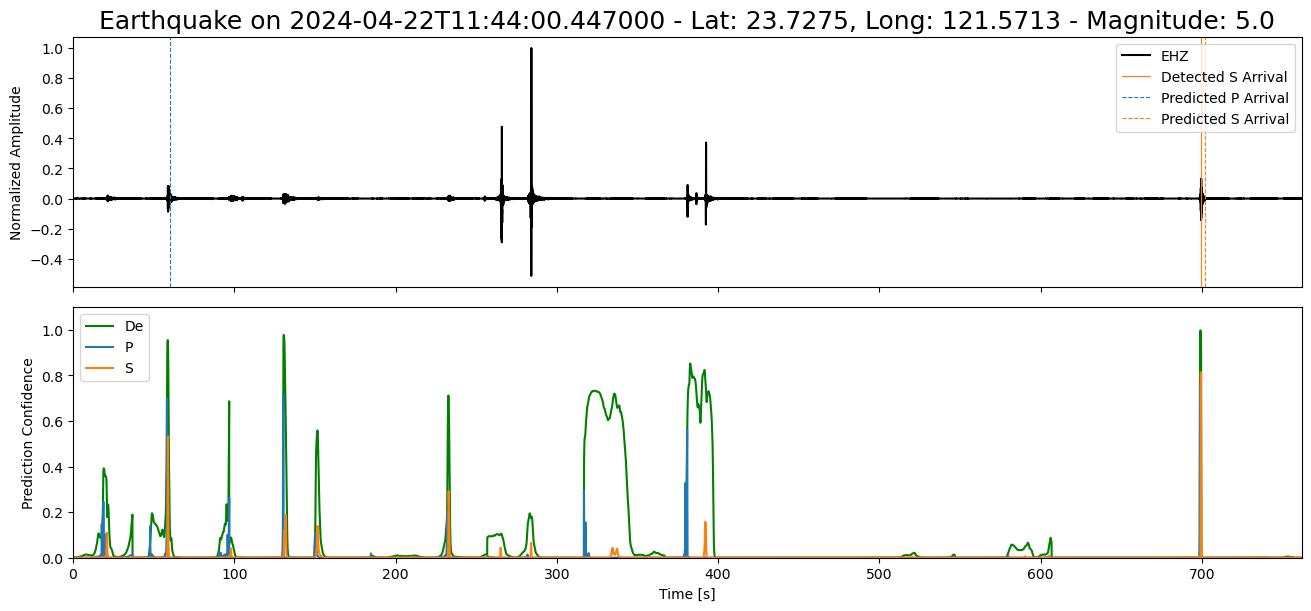

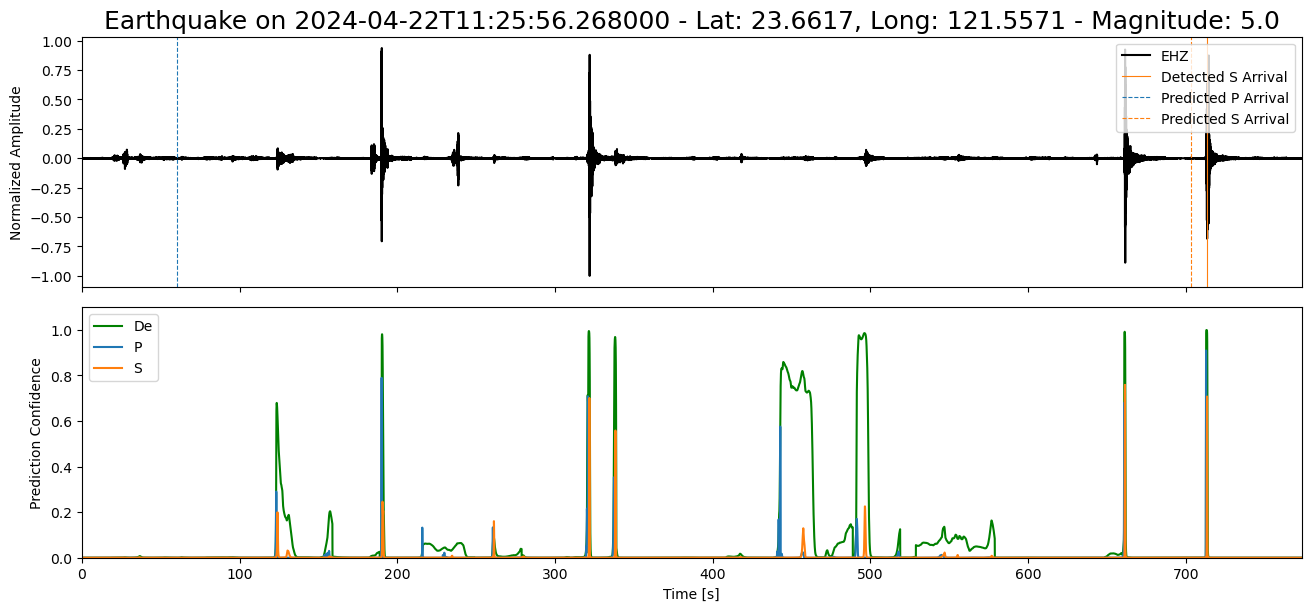

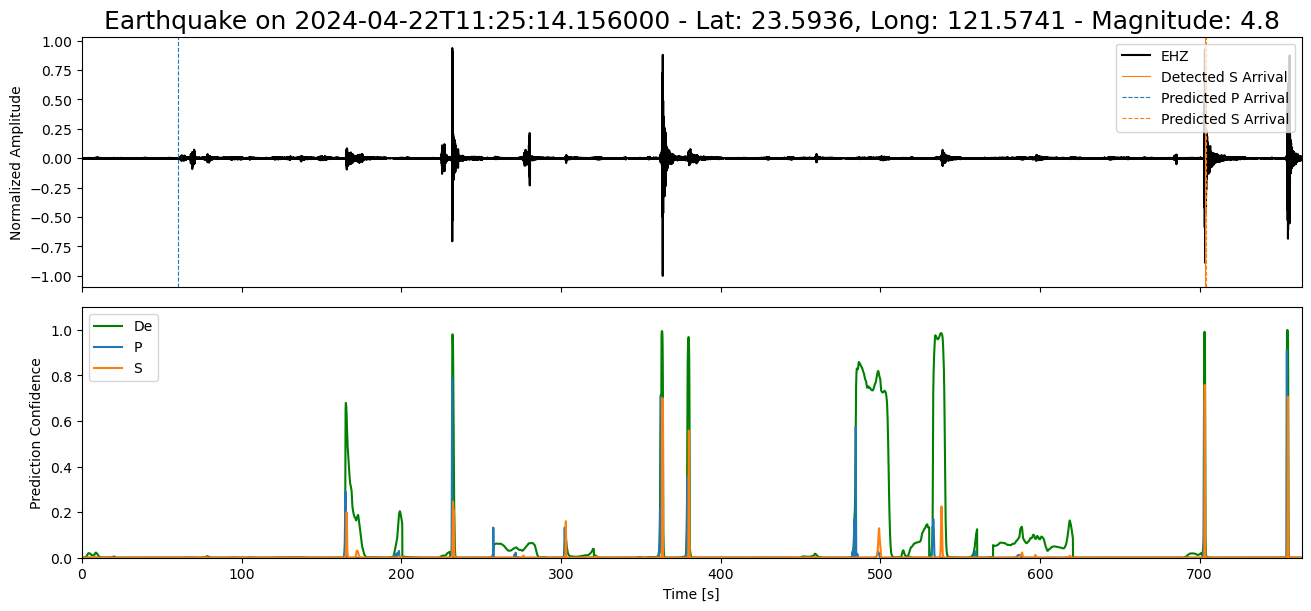

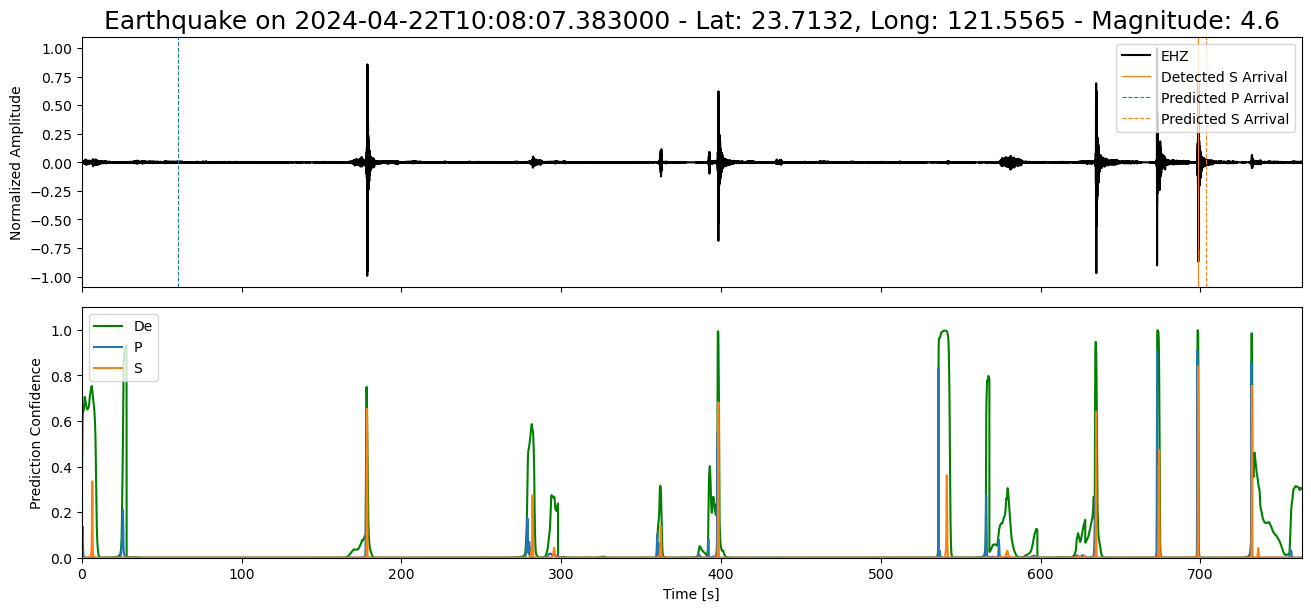

In [17]:
matched_events = saved_df_completed[(saved_df_completed['catalogued'] == True) & (saved_df_completed['detected'] == True)]

for _, row in matched_events.iterrows():
    earthquake_info = get_event_info(row)  
    
    if matched_events.empty:
        continue
    plot_predictions_wave(saved_processed_stream,saved_annotated_stream, earthquake_info, path=content_path,show=True, save=False)

In [18]:
for _, row in matched_events.iterrows():
    earthquake_info = get_event_info(row)  
    
    if matched_events.empty:
        continue
    plot_predictions_wave(saved_processed_stream,saved_annotated_stream, earthquake_info, path=content_path,show=False, save=True)

Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-22\generated\annotation_11831857.png
Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-22\generated\annotation_11835435.png
Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-22\generated\annotation_11837480.png
Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-22\generated\annotation_11836394.png
Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-22\generated\annotation_11831548.png
Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-22\generated\annotation_11831570.png


Statistics For Matched Events

In [19]:
for _, row in matched_events.iterrows():
    earthquake_info = get_event_info(row)  
    
    if matched_events.empty:
        continue
    print_event_info(earthquake_info)

Event ID: smi:service.iris.edu/fdsnws/event/1/query?eventid=11831857
Earthquake Time: 2024-04-23T00:03:49.290000
Location: Lat 23.6992, Long 121.6391
Magnitude: 4.5 mb
Depth: 20652.0 m
Distance to Station: 9776.59 km

Predicted P time: 2024-04-23T00:16:37.432461
Detected P time: 2024-04-23T00:16:35.020000
Predicted S time: 2024-04-23T00:27:19.780646
Detected S time: nan
Prediction confidence: P: 0.798008382320404   S: nan
----------------------------------------
Event ID: smi:service.iris.edu/fdsnws/event/1/query?eventid=11835435
Earthquake Time: 2024-04-22T16:01:57.684000
Location: Lat 23.7037, Long 121.6499
Magnitude: 4.6 mb
Depth: 6864.0 m
Distance to Station: 9776.69 km

Predicted P time: 2024-04-22T16:14:48.119952
Detected P time: 2024-04-22T16:14:43.060000
Predicted S time: 2024-04-22T16:25:32.092447
Detected S time: nan
Prediction confidence: P: 0.8548012971878052   S: nan
----------------------------------------
Event ID: smi:service.iris.edu/fdsnws/event/1/query?eventid=118374

Generate HTML Codes For Email

In [20]:
html_path = create_earthquake_report_html(saved_df_completed, content_path, date, station, provider)

HTML report generated: D:\Dissertation\data\AM.R50D6\2024-04-22\generated\2024-04-22_report.html
